`Random Forest` is an `ensemble` machine learning algorithm used for `classification` and `regression` tasks. It's a type of supervised learning algorithm that combines multiple decision trees to improve the accuracy and robustness of predictions.

`How Random Forest Works:
`
1. Decision Trees: Multiple decision trees are trained on different subsets of the data.
2. Bootstrap Sampling: Each decision tree is trained on a random subset of the data, with replacement.
3. Feature Randomization: Each decision tree selects a random subset of features to consider at each split.
4. Voting: The final prediction is made by combining the predictions of all decision trees.

`Advantages`:

1. Improved Accuracy: Random Forest often outperforms single decision trees and other algorithms.
2. Robustness: Random Forest is robust to overfitting and noise in the data.
3. Handling High-Dimensional Data: Random Forest can handle high-dimensional data with many features.
4. Handling Missing Values: Random Forest can handle missing values in the data.

`Applications`:

1. Classification: Random Forest is widely used for classification tasks, such as image classification, sentiment analysis, and medical diagnosis.
2. Regression: Random Forest is used for regression tasks, such as predicting continuous outcomes like house prices or stock prices.

`Hyperparameters:
`
1. Number of Trees: The number of decision trees to combine.
2. Maximum Depth: The maximum depth of each decision tree.
3. Number of Features: The number of features to consider at each split.

Random Forest is a powerful algorithm that's widely used in machine learning applications due to its accuracy, robustness, and flexibility.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [27]:
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == "object" or data[col].dtype.name == "category":
        data[col] = le.fit_transform(data[col])

In [29]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4



Confusion Matrix:
 [[ 17  53]
 [ 26 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.24      0.30        70
           1       0.65      0.79      0.72       126

    accuracy                           0.60       196
   macro avg       0.52      0.52      0.51       196
weighted avg       0.56      0.60      0.57       196



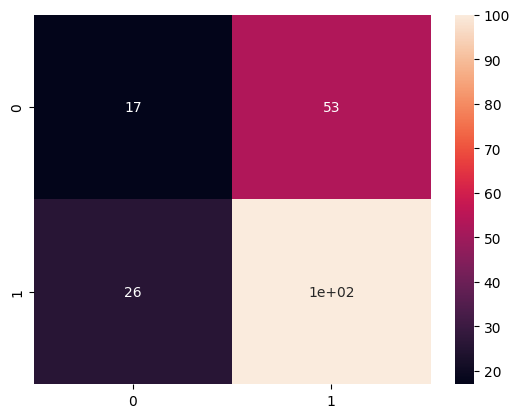

In [51]:
X = data.drop(columns='sex', axis=1)
y = data["sex"]
train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2)
model = RandomForestClassifier(random_state=42)
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))
sns.heatmap(data=confusion_matrix(test_Y, y_pred), annot=True)
plt.show()

In [31]:
X = data.drop(columns='tip', axis=1)
y = data["tip"]
train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)
print(f'MSE = {mean_squared_error(test_Y, y_pred)}')
print(f'R2 = {r2_score(test_Y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(test_Y, y_pred))}')


MSE = 1.09014397
R2 = 0.394453177230515
RMSE = 1.0440995977396026
